In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
INIT_LR = 1e-4
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=50

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_set = train_datagen.flow_from_directory(
        'Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical',
)

Found 2682 images belonging to 2 classes.


In [5]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_set = validation_datagen.flow_from_directory(
        'Dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 382 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_set = test_datagen.flow_from_directory(
        'Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 769 images belonging to 2 classes.


In [7]:
class_names = list(train_set.class_indices.keys())
class_names

['with_mask', 'without_mask']

In [8]:
vgg = VGG16(input_shape=[IMAGE_SIZE,IMAGE_SIZE] + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001, 
    patience=20,
    mode="max",
    restore_best_weights=True,
)

In [12]:
history =  model.fit(
  train_set,
  validation_data=validation_set,
  epochs=500,
  steps_per_epoch=len(train_set),
  validation_steps=len(validation_set),
  callbacks=[early_stopping]
)

Epoch 1/500


: 

: 

In [ ]:
model.evaluate(test_set)

25/25 [==============================] - 50s 2s/step - loss: 0.0395 - accuracy: 0.9909


[0.039471585303545, 0.9908972978591919]

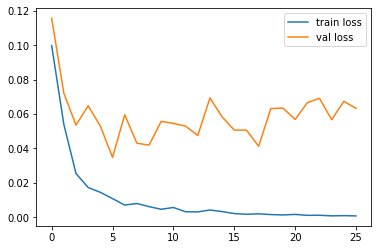

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

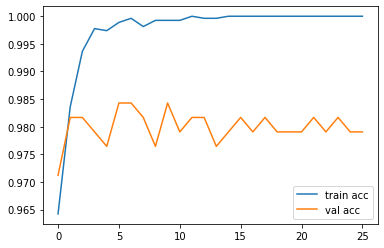

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save("Models/mask_detector.model", save_format="h5")

In [1]:
image1 = tf.keras.utils.load_img(r"D:\Users\Biki\Google Drive\My Pictures\AdityaBC.jpg")
image1 = image1.resize((224,224))
img_array = np.array(image1)
img_array = np.expand_dims(img_array, axis=0)
img_data = preprocess_input(img_array)
prediction = model.predict(img_data)
ans = class_names[np.argmax(prediction[0])]
print(prediction)
print(ans)

NameError: name 'tf' is not defined